# 向量導向的計算方式

## 1. Python 正規套件讀法

我們在一開始就用了一個魔術指令

    %pylab inline
    
但這個其實現在不太建議, 因為會讓套件讀入有點混亂。主要讀入兩個套件

* `matplotlib`: 畫圖的標準套件
* `numpy`: 數學計算的標準套件

而且用了很多種不同方式讀入, 我們現在導向「正規」方式。

#### 標準套件讀入方式 1

```python
from 套件 import 指定函數
```

以後就可以直接用我們引入的函數! 比如說:

```python
from numpy import sin
```

以後可直接用 sin 函數。有些時候我們用:

```python
from 套件 import *
```

這就是那套件所有函數都進來! 這不太建議, 雖然用來方便。

### 例子

    from random import randint
    from numpy.random import randint
    
這兩個看來一模一樣的, 其實有點小小差別。

ModuleNotFoundError: No module named 'njkdsjf'

#### 套件標準讀入方式 2

第二個方式也許是最標準的:

```python
import numpy
```

這樣我們可以不用先計畫好到底要哪些函數, 全都可以用而且也不會亂掉。因為比如要算 sin(3), 就會變成

```python
numpy.sin(3)
```

等等, 這有人會這樣做嗎? 這不會發瘋嗎? Python 還提供了縮寫, 我們自己愛怎麼叫這個套件就怎麼叫。有趣的是, 一些知名套件都有「標準」縮寫方式。用「正確」的方式人家都覺得我們是行家。比如說

```python
import numpy as np
```

這之後就可以用

```python
np.sin(3)
```

來算 sin(3) 了。

#### 標準 Jupyter 數據分析設定

以後一開始用 Jupyter 我們都打入這串, 大家就覺得我們是內行的。

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## 2. Array 真是太炫了

科學計算一個很核心的概念叫 "array oriented" 的寫法。Array 是 `numpy` 標準的資料結構, 和 list 很像, 但就差了那麼一點點。而這一點點讓我們在計算上是無比的方便。

### 練習 (匯率換算)

假設今天我想查查號稱 Pentax 三公主的 31mm, 43mm, 77mm 三隻 limited 鏡頭在美國賣多少。於是我去 B&H 查了他們的價格分別是:

    prices = [1096.95, 596.95, 896.95]
    
我又查了 Google 匯率 1 美金為 31.34 元。請把三支鏡頭的價格換算為台幣。

#### 解一: 迴圈版

In [14]:
prices = [1096.95, 596.95, 896.95]
for i in range(len(prices)):
    prices[i] = prices[i] * 31.34
print(prices)    

[34378.413, 18708.413, 28110.413]


#### 解二: array 版

In [15]:
prices = np.array([1096.95, 596.95, 896.95])
prices*31.34


array([34378.413, 18708.413, 28110.413])

### 練習 (成績計算)

一位老師成績這樣算的:

* 平時成績 20%
* 期中考   35%
* 期未考   45%

有位同學

* 平時成績 85 分
* 期中 70 分
* 期末 80 分

這位同學的學期成績是多少?

In [17]:
rate = np.array([0.2,0.35,0.45])
score = np.array([85,70,80])
np.sum(rate*score)

77.5

In [19]:
np.dot(rate,score)

77.5

In [ ]:
score = np.array([85,70,80],
                [85,70,80],
                [85,70,80])

### 練習 (成績計算之 2)

一個班上當然不只一位同學, 很多同學難道我們就需要 `for` 迴圈嗎?

In [21]:
multi_grades = np.array([[92, 18, 54], 
 [85, 90, 20],
 [39, 55, 60],
 [77, 87, 97]])

很重要的是, 我們來瞭解這個陣列的 shape

In [27]:
multi_grades.shape

(4, 3)

In [28]:
rate.shape

(3,)

基本上就想成 4x3 的矩陣。

不過也可以想成, 有 4 個元素 (4 位同學) 的 array, 每個元素就是一位同學的成績。

所以這樣就可以算所有同學的成績, 基本上和向量的純量乘法一樣意思, 想得通嗎?

### 重要的 array 大變身!
我們在數據分析, 常常要改 array 的型式。

[練習] 一個 50 個數字的 array
先想辦法、用亂數做出 50 個數字的 array, 叫做 A 好了。

In [ ]:
A = np.random.rand(50)

In [ ]:
A

檢查 A 的 shape

更改 A 的 shape

## 4. Array 讓畫圖更方便

這裡介紹用 array 來畫圖, 還有 subplots 的用法。

基本畫圖法

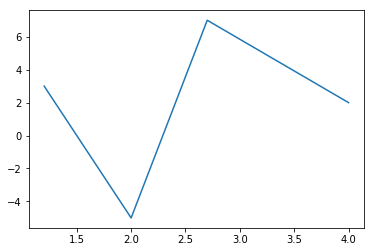

In [29]:
plt.plot([1.2, 2, 2.7, 4], [3, -5, 7, 2])

plot 一個函數
我們先用 np.linspace 在 x 的指定範圍中取指定個點。

In [30]:
x = np.linspace(0, 10, 100)

畫出

            𝑓(𝑥)=sin(𝑥)+𝑥

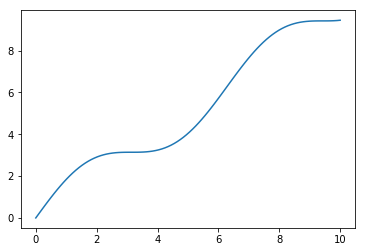

In [32]:
plt.plot(x,np.sin(x)+x)

同時畫兩個函數

In [ ]:
x = np.linspace(0, 10, 100)

介紹 subplot

In [41]:
x = np.linspace(0, 10, 100)

# 圖 1
plt.subplot(226)
plt.plot(x, np.sin(x) + x)

# 圖 2
plt.subplot(222)
plt.plot(x, np.cos(3*x))

ValueError: num must be 1 <= num <= 4, not 6

<Figure size 432x288 with 0 Axes>

## 5. 快取我們要的部份

`array` 有個很有趣的用法...

In [42]:
L = np.array([3, -2, -1, 5, 7, -3])

取出正的數值

In [43]:
L>0

array([ True, False, False,  True,  True, False])

In [44]:
L[L>0]

array([3, 5, 7])

[練習] 畫個函數 (如  sinc ), 標出正的部份!

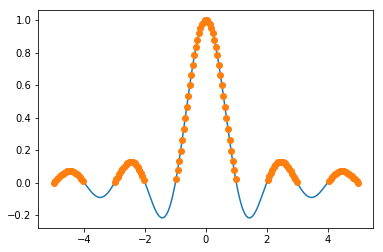

In [45]:
x = np.linspace(-5, 5, 200)
y = np.sinc(x)

plt.plot(x, y)
plt.plot(x[y>0], y[y>0], 'o')